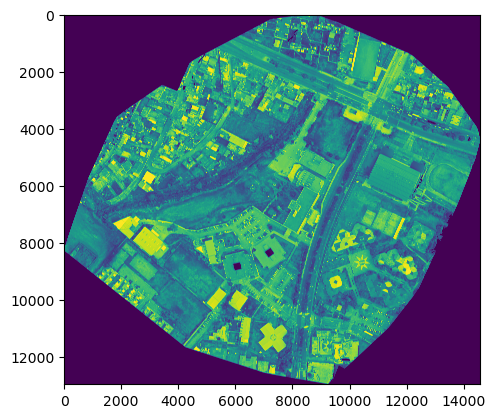

In [6]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

def create_masked_image(image_path, shapes):
    # Open the raster and read in the shapefiles as a mask
    with rasterio.open(image_path) as src:
        out_image, out_transform = mask(src, shapes, crop=True)
        out_meta = src.meta.copy()
    
    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})
    
    return out_image, out_meta

def plot_image(image):
    plt.imshow(image[0], cmap='viridis')
    plt.show()

# Load shapefiles using Geopandas
## Create an array of file path geometry
main_path = "C:/Users/max/Documents/{file_name}.shp"
gdf_list =  ["Background", "Grass", "Bush", "Vegetation", "Foreground_UPS"]
gdf = gpd.read_file(main_path.format(file_name=gdf_list[0]))

# Convert the geometries to the format expected by rasterio
geometries = [feature["geometry"] for _, feature in gdf.iterrows()]

# Path to your orthophoto
image_fp = 'D:/development/UPS/2018 - DJI P4 Pro/UPS_SUR_transparent_mosaic_group1.tif'

# Create the masked image
masked_image, meta = create_masked_image(image_fp, geometries)

# Display the image
plot_image(masked_image)